In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
colnames =["subject","unknown", "nums", "xcoor", "ycoor", "pupsize", "timing", "trial","experiment", "tone1", "tone2", "condition", "image", "one", "dot1", "dot2", "dot3", "trialfalse", "NOCLICK", "noclick"]
df_podcdat = pd.read_csv('POJMI4.csv', names=colnames)
#put timing column into list to make easier to work with pandas
timing = df_podcdat.timing.tolist()
pupsize = df_podcdat.pupsize.tolist()


In [2]:
new_timing=[]
for i in range(len(timing)):#Start from begining to end of timing list
    num = timing[i]#set num = to timing at specific location in list
    if num%2 !=0:# if number divided by 2 has a remainder that is not 0
        num = num + 1 # take that number with the nonzero remainder and add one to it
        new_timing.append(num)# take the new number and append it to the new_timing list
    else:# if the number is even
        new_timing.append(num)# take the even number and append it to the new_timing list
(len(timing),len(new_timing)) # show me the length of the old timing list with the new timing list to double check we
# have the same number of values

new_timing = pd.DataFrame(new_timing)

In [3]:
#new_timing.head()

In [4]:
result = pd.concat([df_podcdat, new_timing], axis=1)
result = result.rename(columns = {0:'newtiming'})
result.head()

,subject,unknown,nums,xcoor,ycoor,pupsize,timing,trial,experiment,tone1,...,condition,image,one,dot1,dot2,dot3,trialfalse,NOCLICK,noclick,newtiming
0,POJMI4.asc,unknown,7232610,619.2,535.2,710,1,1,PO,CGVV,...,dv.wav,new31.jpeg,1,.,.,.,trial2,NOCLICK,noclick,2
1,POJMI4.asc,unknown,7232612,619.2,535,710,3,1,PO,CGVV,...,dv.wav,new31.jpeg,1,.,.,.,trial2,NOCLICK,noclick,4
2,POJMI4.asc,unknown,7232614,619.2,534.8,710,5,1,PO,CGVV,...,dv.wav,new31.jpeg,1,.,.,.,trial2,NOCLICK,noclick,6
3,POJMI4.asc,unknown,7232616,619.2,534.8,710,7,1,PO,CGVV,...,dv.wav,new31.jpeg,1,.,.,.,trial2,NOCLICK,noclick,8
4,POJMI4.asc,unknown,7232618,619.2,535.1,710,9,1,PO,CGVV,...,dv.wav,new31.jpeg,1,.,.,.,trial2,NOCLICK,noclick,10


In [5]:
pup_zeros=[]
for i in range(len(pupsize)):#Start from begining to end of pupsize list
    num = pupsize[i]#set num = to pupsize at specific location in list, index?
    if num == 0:# if number is 0
        pup_zeros.append(i)# take the index location and append it to the pup_zeros list
(len(pupsize),len(pup_zeros)) # show me the length of the pupsize list with the pup_zeros list to check it looks right

(133556, 3623)

In [6]:
pup_array=np.asarray(pupsize)
np.where(pup_array==0)
#hi=np.where(pup_array==0)
#hi
#hey=(pup_array==0).sum()
#hey

(array([   450,    451,    452, ..., 131732, 131733, 131734]),)

In [7]:
pz = pd.DataFrame(pup_zeros)
pup_all = pd.DataFrame().reindex_like(pz)
before = pd.DataFrame().reindex_like(pz)
after = pd.DataFrame().reindex_like(pz)

In [8]:
pup_all = pup_all.rename(columns = {0:'original'})
before = before.rename(columns = {0:'before'})
after = after.rename(columns = {0:'after'})
pup_all = pd.concat([pup_all, before, after],axis=1)
pup_all.head()

,original,before,after
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [9]:
for i in range(len(pup_zeros)):
    pup_all.original[i] = pup_zeros[i]
    pup_all.before[i] = pup_zeros[i] - 75
    pup_all.after[i] = pup_zeros[i] + 75
    

#group by sequence
#take list value by value find one not a number in sequence pull and store index of 150 samples before vlaue 
#then if next not is only one greater then last one if it is greater make that a new one 
    

In [10]:
# test1=result["pupsize"][400:1000]
# axes = plt.gca()
# axes.set_xlim([400,1000])
# axes.set_ylim([0,900])
# axes.plot(test1)


In [11]:
pup_all.head()

,original,before,after
0,450.0,375.0,525.0
1,451.0,376.0,526.0
2,452.0,377.0,527.0
3,453.0,378.0,528.0
4,454.0,379.0,529.0


In [12]:
start=0
end=0
i=1

while start==0 or end==0:
    
    if result.pupsize[i]==0 and result.pupsize[i-1]!=0:
        start=i
        
            
    if result.pupsize[i]==0 and result.pupsize[i+1]!=0:
        end=i
    i=i+1
print(start,end)

450 530


In [ ]:
# start=0
# end=0
# i=1
# new_pup=[]
# while start==0 or end==0:
#     for j in range(len(result.pupsize))
    
#         if result.pupsize[i]==0 and result.pupsize[i-1]!=0:
#             start=i
#             new_pup.append[result.pupsize[i]]
            
#         if result.pupsize[i]==0 and result.pupsize[i+1]!=0:
#             end=i
#         i=i+1
# print(start,end)

In [13]:
space=75
n=end-start+2*space

In [14]:
interp=np.linspace(result.pupsize[start-space],result.pupsize[end+space],n)

In [15]:
interp

array([ 675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,  675.,
        675.,  675.,

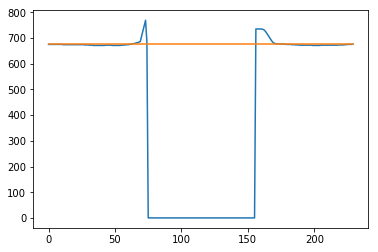

In [16]:
bad1=list(np.array(result.pupsize)[(start-space):(end+space)])
plt.plot(bad1)
plt.plot(interp)

In [17]:
np.array(result.pupsize)[(start-space):(end+space)]
list(np.array(result.pupsize)[(start-space):(end+space)])

[675,
 675,
 675,
 675,
 675,
 675,
 675,
 675,
 675,
 675,
 675,
 674,
 674,
 674,
 674,
 674,
 674,
 674,
 674,
 674,
 674,
 674,
 674,
 674,
 674,
 674,
 674,
 673,
 673,
 673,
 673,
 672,
 672,
 672,
 671,
 671,
 671,
 671,
 671,
 671,
 671,
 671,
 671,
 672,
 672,
 672,
 672,
 672,
 671,
 671,
 671,
 671,
 671,
 671,
 671,
 672,
 672,
 673,
 673,
 674,
 674,
 675,
 676,
 677,
 678,
 679,
 681,
 682,
 684,
 686,
 707,
 728,
 748,
 769,
 684,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 735,
 735,
 735,
 735,
 735,
 734,
 732,
 727,
 720,
 712,
 704,
 696,
 688,
 682,
 679,
 678,
 677,
 677,
 677,
 676,
 676,
 676,
 676,
 675,
 675,
 675,
 675,
 674,
 674,
 674,
 673,
 673,
 673,
 672,
 672,
 672,
 672,
 672

In [ ]:
#try to see looping everything how long it works

# try using numpy.where

#something that we can just see where the NaNs or 0's so that we dont have to loop through specific section of the code
#aka it gets everything in one run

In [ ]:
pup_all.before[0]

In [ ]:
for i in range(len(pup_all)):
    np.linspace(pup_all.before[i],pup_all.after[i],)
    
    

In [ ]:
np.linspace

In [ ]:
test1=result["pupsize"][400:1000]
axes = plt.gca()
axes.set_xlim([400,1000])
axes.set_ylim([0,900])
axes.plot(test1)


In [ ]:
(pup_all.before[0])

In [ ]:
#result.pupsize[pup_all.before[0]] = None

In [ ]:
for i in range(len(pup_all)):
    result.pupsize[pup_all.before[i],pup_all.after[i]] = None
    

In [ ]:
result.pupsize[450]

In [ ]:
result[result.pupsize.isnull()][0:5]
#result[result.pupsize==450]

In [ ]:
result.pupsize[375:400]